# Aula 12 e 13 - Regressão Polinominal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Criando dataset baseado em uma parábola
#Adiciona ruído com distribuição normal
x = 10*np.random.normal(0,1,70)
y = 10*(-x**2) + np.random.normal(-100,100,70)

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)

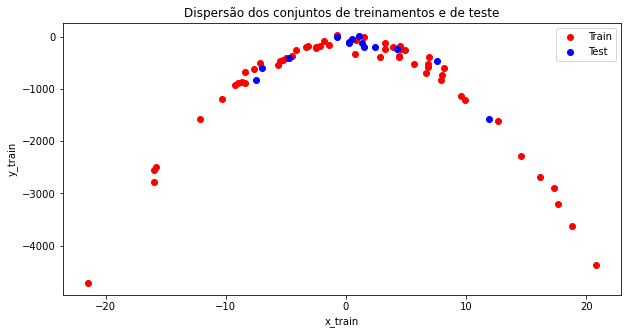

In [4]:
#Gráfico de dispersão do dataset
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color='r', label='Train')
plt.scatter(x_test, y_test, color='b', label='Test')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Dispersão dos conjuntos de treinamentos e de teste')
plt.show()

## Regressão Linear

In [5]:
from sklearn.linear_model import LinearRegression

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [6]:
#Resultado da Regressão Linear

y_train_pred = lm.predict(x_train)

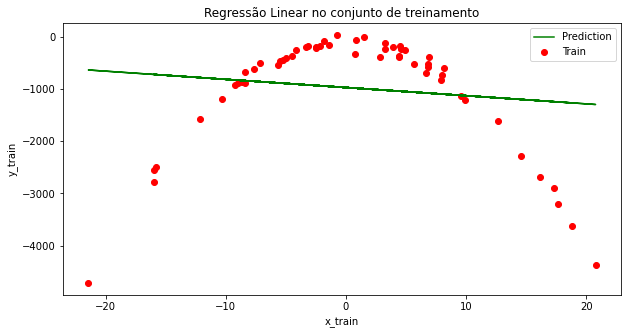

In [7]:
#Gráfico da Regressão Linear no conjunto de treinamento
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color = 'r', label='Train')
plt.plot(x_train, y_train_pred, color = 'g', label='Prediction')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Regressão Linear no conjunto de treinamento')
plt.show()

In [8]:
#Cálculo do R**2
r2 = lm.score(x_train**2, y_train)
print("R quadrado para Regressão Linear simples: ",r2)

R quadrado para Regressão Linear simples:  -0.8363895596222346


## Regressão Polinomial

In [9]:
#Ordenar o dataset
trainset = np.concatenate((x_train,y_train),axis=1)
trainset = trainset[trainset[:,0].argsort()]

testset = np.concatenate((x_test,y_test),axis=1)
testset = testset[testset[:,0].argsort()]

x_train = trainset[:,0].reshape(-1,1)
y_train = trainset[:,1].reshape(-1,1)
x_test = testset[:,0].reshape(-1,1)
y_test = testset[:,1].reshape(-1,1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train_poly, y_train)

lm_poly = LinearRegression()
lm_poly.fit(x_train_poly, y_train)

LinearRegression()

In [11]:
y_train_poly_pred = lm_poly.predict(x_train_poly)

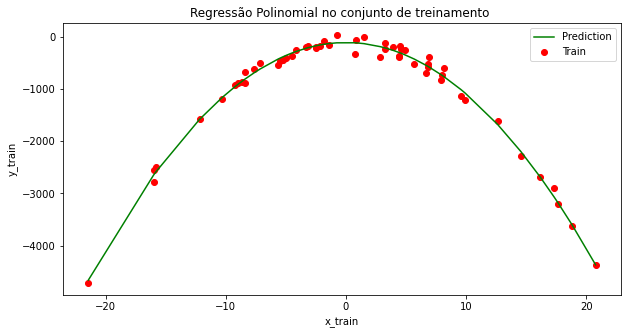

In [12]:
#Gráfico da regressão polinomial no conjunto de treinamento
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color = 'r', label='Train')
plt.plot(x_train, y_train_poly_pred, color = 'g', label='Prediction')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Regressão Polinomial no conjunto de treinamento ')
plt.show()